# **Machine Learning Tutorial - TensorFlow**

This Jupyter Notebook files is a simple tutorial for Python users on the BSU Borah cluster. We will focus on TensorFlow in this tutorial.

## **Scenario 1: Starting a new project.**

If you are starting a new project, it is better to create a new Python environment and install all the packages needed in it. Follow the steps in the link below to create a new Python environment on Borah.

[Click here](https://bsu-docs.readthedocs.io/en/latest/software/conda/)
    
For simplicity I will show the steps here, assuming that you will not need to use GPUs and already have conda/mamba installed. Ideally, if you know all the packages you will be using in your project, then it is better to install all of them at the point of creating your Python environment. This helps to prevent conflicts between package versions and dependencies. Here, we will create a new Python environment calle `ml_tutorial` that has some of the most popular and widely used Machine Learning (ML) Python packages installed in it. In this environment we need the following packages:
- pandas
- numpy
- matplotlib
- ipykernel
- pytorch (Note: Torch (built on Lua, a scripting language) and and PyTorch (built on Python) differ in origin. Also, the community and support for torch is diminishing, so it recommended to install PyTorch instead of torch. However, in Python, torch is the main package name for PyTorch. When you install PyTorch, you import it using `import torch`, not `import pytorch`.
- torchvision
- tensorflow
- tensorflow-gpu (for those who have need for GPUs)
- tensorboard
- scikit-learn

Notice, how there are no white spaces in my environment name. This is very important. You can change the environment.

Also note, per the new tensorflow update, once you install tensorflow you don't necessary have to install tensorbaord separately. However, for the purpose of this tutorial, I will just go ahead to install the two of them separately.
     
Run the following commands:

### **Step 1: Create a Python environment**

``` ruby
mamba create -n ml_tutorial -c conda-forge matplotlib numpy pandas ipykernel pytorch torchvision tensorflow tensorflow-gpu tensorboard scikit-learn
```

By extension, if you have up to `n` packages, then the code will be:

```ruby
mamba create -n climate -c conda-forge package1 package2 package3 ... packagen
```

### **Step 2: Add your environment to Borah `OnDemand`**

``` ruby
python -m ipykernel install --user --name ml_tutorial --display-name "ml_tutorial"
```

## **Scenario 2: Installing in an already existing Python environment**
If you already have and existing Python environment for your project, but wants to install additional Python libraries for your ML applications, then just simply skip creating a new Python environment. Just be aware that sometimes, you might have conflicts with some package versions and dependencies, this is normal and can be fixed. Though, sometimes the conflicts are not so easily fixed.

```ruby
mamba install -c conda-forge package1 package2 package3 ... packagen
```

Thus, by extension, if we only want to install the ML libraries in our existing Python environment, we will use the following command.

```ruby
mamba install -c conda-forge pytorch torchvision tensorflow tensorflow-gpu tensorboard scikit-learn
```

Great!!! 
Now the rest of this notebook demonstrates how to do a simple analysis using TensorFlow.

## **ML Tutorial**
Here we will rely on some in-built datasets in Python to build very simple ML models. Note that the idea here is to demonstrate simply how to install and use this libraries on Borah. We don't care so much about the model's accuracy or performance.

### **The MNIST Problem: Handwritten Digit Classification**  

### **Overview**  
The **MNIST (Modified National Institute of Standards and Technology) dataset** is a classic **machine learning problem** where the goal is to classify **handwritten digits (0-9)**. The dataset consists of **70,000 grayscale images** of digits, each **28×28 pixels** in size.  

#### **Why is MNIST Important?**  
- It serves as the **"Hello World"** of deep learning and computer vision.
- It helps in testing **image classification algorithms**.
- It is small and easy to use but still challenging enough to evaluate different models.

---

### **Problem Definition**
The task is to train a **machine learning model** that can **automatically recognize handwritten digits** from images.

1. **Input:** A **grayscale image (28×28 pixels)** of a handwritten digit.
2. **Output:** A **single label (0-9)** representing the digit in the image.
3. **Model Type:** This is a **supervised classification** problem.

---

### **Dataset Breakdown**
- **Training Set:** 60,000 images.
- **Test Set:** 10,000 images.
- **Classes:** 10 (digits 0-9).
- **Image Properties:**
  - 28×28 pixels.
  - Each pixel has a value between **0 (black) and 255 (white)**.
  - No color channels (grayscale).
  - Images vary in style due to different handwriting.

---

### **Challenges of the MNIST Problem**
1. **Variability in Handwriting:** Different people write digits differently.
2. **Noise in Data:** Some images might be blurry or poorly written.
3. **Generalization:** The model should work on unseen handwritten digits.

---

### **Approaches to Solve MNIST**
There are several ways to tackle the problem:

| Approach | Method |
|----------|--------|
| **Basic Approach** | Logistic Regression, k-Nearest Neighbors (KNN) |
| **Deep Learning Approach** | Fully Connected Neural Networks (FCNN) |
| **Advanced Approach** | Convolutional Neural Networks (CNNs) |

---

### **Applications of MNIST Classification**
- Optical Character Recognition (**OCR**) in postal services.
- Digit recognition for **bank check processing**.
- Handwriting analysis in **touchscreen devices**.

### **Tutorial 1: TensorFlow Machine Learning Tutorial**
**Objective: Train an ML model using TensorFlow to classify images in the MNIST dataset (handwritten digits from 0 to 9).**

### **Step 1: Import Required Libraries**

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

### **Step 2: Load the MNIST Dataset**
The MNIST handwritten digits recognition problem is very popular in the ML world. The MNIST dataset consists of 28×28 grayscale images of handwritten digits (0-9). Due to its wide usage, the dataset is available in Python, so there is not need to download it from an external source.

In [2]:
# Load dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data (scale pixel values between 0 and 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Check dataset shape
print(f"Training data shape: {x_train.shape}, Labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Labels shape: {y_test.shape}")


Training data shape: (60000, 28, 28), Labels shape: (60000,)
Test data shape: (10000, 28, 28), Labels shape: (10000,)


### **Step 3: Build a Neural Network Model**
We will create a simple feedforward neural network with one hidden layer.

In [3]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten 28x28 images into 1D array
    keras.layers.Dense(128, activation='relu'),  # Fully connected layer with 128 neurons
    keras.layers.Dropout(0.2),  # Dropout to reduce overfitting
    keras.layers.Dense(10, activation='softmax')  # Output layer with 10 classes (digits 0-9)
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


2025-02-11 12:21:40.097909: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cm/shared/apps/slurm/current/lib64/slurm:/cm/shared/apps/slurm/current/lib64:/cm/shared/apps/jupyterhub/lib:/bsuhome/tnde/.conda/envs/mass_cal/lib/
2025-02-11 12:21:40.097943: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2025-02-11 12:21:40.097965: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (cpu139): /proc/driver/nvidia/version does not exist
2025-02-11 12:21:40.098238: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them 

### **Step 4: Train the Model**

In [4]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

2025-02-11 12:21:43.730625: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2997 - accuracy: 0.9119 - val_loss: 0.1446 - val_accuracy: 0.9569
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1439 - accuracy: 0.9575 - val_loss: 0.1019 - val_accuracy: 0.9697
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1059 - accuracy: 0.9683 - val_loss: 0.0879 - val_accuracy: 0.9738
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0887 - accuracy: 0.9732 - val_loss: 0.0765 - val_accuracy: 0.9775
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0737 - accuracy: 0.9773 - val_loss: 0.0722 - val_accuracy: 0.9785
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0661 - accuracy: 0.9790 - val_loss: 0.0684 - val_accuracy: 0.9808
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0586 - accuracy: 0.9810 - val_loss: 0.0708 - val_accuracy:

### **Step 5: Evaluate the Model**

In [5]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")


313/313 [==============================] - 0s 504us/step - loss: 0.0753 - accuracy: 0.9783
Test accuracy: 0.9783


### **Step 6: Make Predictions**


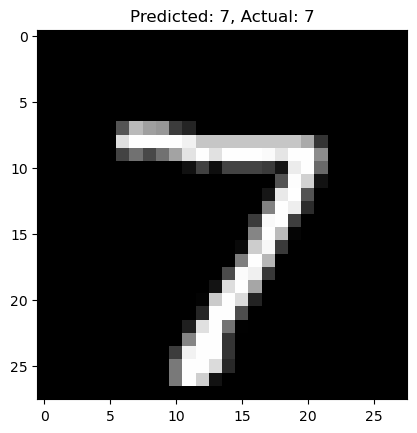

In [6]:
predictions = model.predict(x_test)

# Plot example image and predicted label
plt.imshow(x_test[0], cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[0])}, Actual: {y_test[0]}")
plt.show()


## **Tutorial 2: TensorFlow CNN Tutorial - Handwritten Digit Classification**
**Objective: Train a Convolutional Neural Network (CNN) using TensorFlow to classify handwritten digits in the MNIST dataset.**

### **Step 1: Import Required Libraries**

In [7]:
# import numpy as np
# import tensorflow as tf
# from tensorflow import keras
# import matplotlib.pyplot as plt

### **Step 2: Load and Preprocess the MNIST Dataset**

In [8]:
# Load dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape data to include a channel dimension (for CNNs)
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# Print dataset shape
print(f"Training data shape: {x_train.shape}, Labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Labels shape: {y_test.shape}")


Training data shape: (60000, 28, 28, 1), Labels shape: (60000,)
Test data shape: (10000, 28, 28, 1), Labels shape: (10000,)


### **Step 3: Define the CNN Architecture**
Instead of a simple Dense Neural Network, we will use:

- Convolutional layers to extract features.
- MaxPooling layers to reduce dimensions.
- Dropout layers to prevent overfitting.

In [9]:
model = keras.Sequential([
    # First Convolutional Layer
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Second Convolutional Layer
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten the output
    keras.layers.Flatten(),
    
    # Fully Connected Layer
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),

    # Output Layer with 10 neurons (for digits 0-9)
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

### **Step 4: Train the CNN Model**

In [10]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64)

Epoch 1/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2331 - accuracy: 0.9299 - val_loss: 0.0530 - val_accuracy: 0.9834
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0819 - accuracy: 0.9763 - val_loss: 0.0339 - val_accuracy: 0.9893
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0597 - accuracy: 0.9823 - val_loss: 0.0301 - val_accuracy: 0.9892
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0478 - accuracy: 0.9852 - val_loss: 0.0306 - val_accuracy: 0.9902
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0410 - accuracy: 0.9876 - val_loss: 0.0281 - val_accuracy: 0.9904
Epoch 6/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0341 - accuracy: 0.9898 - val_loss: 0.0249 - val_accuracy: 0.9914
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0310 - accuracy: 0.9904 - val_loss: 0.0236 - val_accuracy: 0.9929
Epoch 

### **Step 5: Evaluate the Model**

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 [==============================] - 0s 1ms/step - loss: 0.0236 - accuracy: 0.9922
Test Accuracy: 0.9922


### **Step 6: Visualize Training Progress**
Plot the accuracy and loss curves for both training and validation.

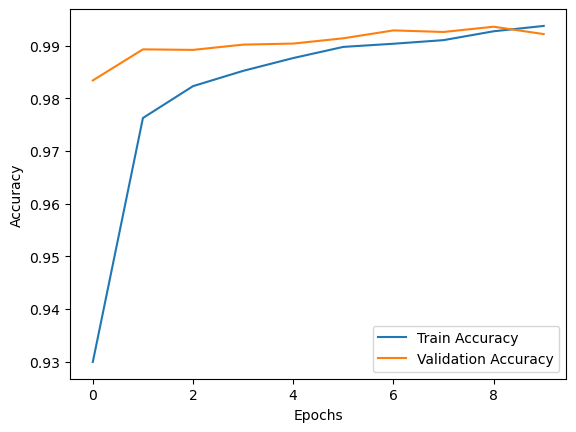

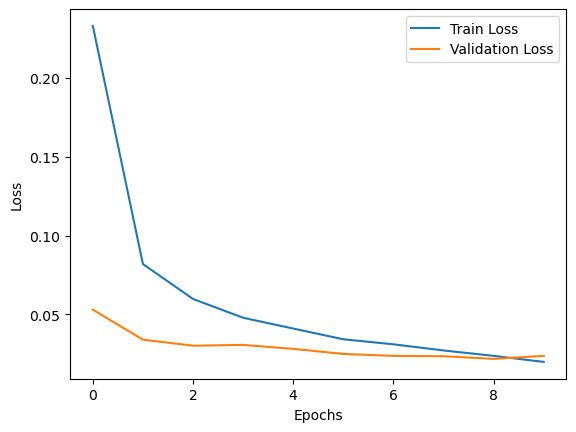

In [12]:
# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### **Step 7: Make Predictions**

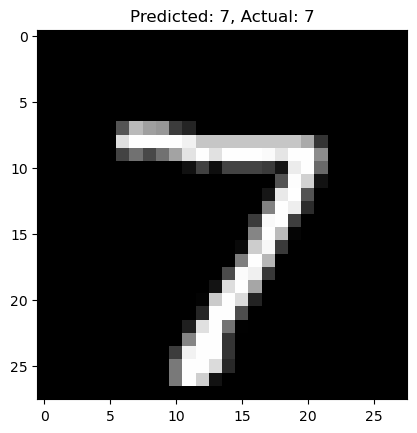

In [13]:
predictions = model.predict(x_test)

# Plot example image and predicted label
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[0])}, Actual: {y_test[0]}")
plt.show()

The simple feedforward neural network model had an accuracy of 97.84\%. Meanwhile the accuracy for the current CNN model 99.26\%. This is expected since the CNN is a more complex model. However, notice that the CNN model took a longer time to train. This is also expected since more complex models require a longer training time. Hence, depending on your specific case, you should find a nice to strike a balance between model accuracy and model complexity (or training time).

### **Next Steps for More Complexity**
The following steps could help you improve the model's accuracy or performance.
- Increase CNN Depth - Add more convolutional layers. An overly complex model will lead to overfitting. Be sure to avoid overfitting by striking a balance between model complexity and overfitting. We can apply Monte dropout to avoid overfitting.  Also, an overly complex model will require more computing resources to train, else, it might take an unnecessarily way too long time to train.
- Use Data Augmentation - Improve generalization with ImageDataGenerator.
- Apply Transfer Learning - Use a pre-trained model like ResNet or VGG16.
- Train on Custom Datasets - Try it with a dataset like CIFAR-10 or Fashion-MNIST.

## **Tutorial 3: Advanced TensorFlow Tutorial - CNN for Fashion Image Classification**

Note that the MNIST handwritten digits problem is a relatively simple and widely studied problem. Even with a simle model we can get a better model performance. Now, let’s make this tutorial more complex by incorporating TensorBoard for visualization and data augmentation for better generalization. We will build a Convolutional Neural Network (CNN) to classify images from the Fashion-MNIST dataset, which is more challenging than MNIST.

**Objective: Train a deep CNN on the Fashion-MNIST dataset, use TensorBoard for visualization, and apply data augmentation to improve generalization.**

### **The Fashion-MNIST Problem: Clothing Item Classification**  

#### **Overview**  
**Fashion-MNIST** is a machine learning dataset designed as a more challenging replacement for the original **MNIST handwritten digit dataset**. The goal is to classify images of **clothing items** into one of **10 categories** using machine learning or deep learning models.

#### **Why Fashion-MNIST?**  
- **More challenging** than MNIST because clothing items have more complex patterns.  
- **Same format as MNIST**, making it easy to experiment with advanced models like CNNs.  
- **Real-world relevance** in applications like **retail, e-commerce, and fashion industry AI**.

---

### **Problem Definition**
The task is to build a **supervised classification model** that can recognize different types of clothing items from grayscale images.

1. **Input:** A **28×28 grayscale image** of a clothing item.  
2. **Output:** A **single label (0-9)** corresponding to the clothing category.  
3. **Model Type:** **Supervised classification problem**.

---

### **Dataset Breakdown**
- **Training Set:** 60,000 images.  
- **Test Set:** 10,000 images.  
- **Classes (10 Categories):**  
  | Label | Class Name | Example |
  |--------|------------|---------|
  | 0 | T-shirt/top | 👕 |
  | 1 | Trouser | 👖 |
  | 2 | Pullover | 🧥 |
  | 3 | Dress | 👗 |
  | 4 | Coat | 🧥 |
  | 5 | Sandal | 🩴 |
  | 6 | Shirt | 👚 |
  | 7 | Sneaker | 👟 |
  | 8 | Bag | 👜 |
  | 9 | Ankle boot | 👢 |

---

### **Challenges of the Fashion-MNIST Problem**
1. **More Visual Complexity** – Unlike MNIST, fashion images have textures and patterns.  
2. **Class Similarity** – Some items (e.g., shirts and coats) look similar, making classification harder.  
3. **Generalization** – The model must recognize items despite variations in style and texture.

---

### **Approaches to Solve Fashion-MNIST**
| Approach | Method |
|----------|--------|
| **Basic Approach** | Logistic Regression, k-Nearest Neighbors (KNN) |
| **Deep Learning Approach** | Fully Connected Neural Networks (FCNN) |
| **Advanced Approach** | Convolutional Neural Networks (CNNs) |
| **State-of-the-Art** | Transfer Learning (using ResNet, EfficientNet, etc.) |

---

### **Applications of Fashion-MNIST Classification**
- **E-commerce AI** – Automatically tag and sort clothing items.  
- **Retail Analytics** – Identify fashion trends using image recognition.  
- **Virtual Try-On Systems** – Power fashion recommendation systems.  


### **Step 1: Import Required Libraries**

In [14]:
import datetime  # For TensorBoard logs
# import numpy as np
# import tensorflow as tf
# from tensorflow import keras
# import matplotlib.pyplot as plt

### **Step 2: Load and Preprocess the Fashion-MNIST Dataset**
Fashion-MNIST consists of 70,000 grayscale images (28×28 pixels) in 10 classes, such as shoes, bags, and shirts.

In [15]:
# Load dataset
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize the data (scale pixel values between 0 and 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape to include a single channel (needed for CNNs)
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32")
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32")

# Print dataset shape
print(f"Training data shape: {x_train.shape}, Labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Labels shape: {y_test.shape}")


Training data shape: (60000, 28, 28, 1), Labels shape: (60000,)
Test data shape: (10000, 28, 28, 1), Labels shape: (10000,)


### **Step 3: Set Up TensorBoard for Visualization**
TensorBoard allows you to monitor model training in real time.

### **What is TensorBoard?**  
TensorBoard is a **visualization tool** that comes with TensorFlow. It helps **monitor, debug, and optimize** machine learning models by providing interactive visualizations for:  

- **Training progress** (loss and accuracy curves)  
- **Model architecture** (graph visualization)  
- **Weight distributions** (to analyze parameter updates)  
- **Performance metrics** (scalars, histograms, images, etc.)  
- **Hyperparameter tuning** (using HParams)  

---
### **Why Use TensorBoard?**
1. **Track Model Training Progress**  
   - View loss and accuracy curves in real-time to detect overfitting or underfitting.  

2. **Visualize the Computation Graph**  
   - Understand the model structure and debug layer connections.  

3. **Analyze Weights and Biases**  
   - Track how model parameters evolve during training.  

4. **Compare Multiple Runs**  
   - Evaluate different hyperparameters and optimizers side by side.  

5. **Monitor Data Inputs and Outputs**  
   - Check how input data is transformed at different layers.  

---

### **TensorBoard Features**
| Feature | What It Does |
|---------|-------------|
| **Scalars** | Tracks metrics like loss & accuracy over time. |
| **Graphs** | Displays the model’s computational graph. |
| **Histograms** | Shows weight and bias distributions. |
| **Images** | Visualizes input images during training. |
| **HParams** | Helps tune hyperparameters like learning rate. |

---

### **Example TensorBoard Workflow**
If you are training a CNN on Fashion-MNIST, TensorBoard can help:  
- Monitor accuracy and loss curves.  
- Check if weights are updating properly.  
- Compare multiple optimizers (SGD, Adam, etc.).  


##### **On Borah, you may not be able to use tensorboard if you do not have GPU access. One possible solution is to install `tensorflow-cpu` instead. It is the CPU-only version of TensorFlor. If you do have GPU access, make sure CUDA is properly loaded.**

In [16]:
# Define TensorBoard log directory
log_dir = "/bsuhome/tnde/scratch/tensorboard/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

2025-02-11 12:22:52.739166: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2025-02-11 12:22:52.739198: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2025-02-11 12:22:52.739452: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


### **Step 4: Create a Data Augmentation Pipeline**

In [17]:
# Create a data augmentation layer
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal"),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),
])


### **Step 5: Define the CNN Architecture**
This CNN has:

- Data augmentation (for better generalization).
- Batch normalization (for stable training).
- Dropout layers (to prevent overfitting). **Dropout** is a **regularization technique**.

Note: If you set dropout rate at 0.5, for instance, then the following will happen to the your model: 

1. **During training**, the model randomly "drops" (sets to zero) **50% of the neurons** in the specified layer **at each iteration**.  
2. This forces the network to **learn multiple independent representations**, making it **more robust** and **less reliant on specific neurons**.  
3. **During inference (testing/prediction), dropout is turned off**, and all neurons contribute to the final prediction. However, their outputs are **scaled down** to match the expected magnitude.  

---

### **Why Use Dropout?**
- **Reduces Overfitting** – Prevents the model from relying too much on specific neurons.  
- **Encourages Generalization** – Forces different parts of the network to learn useful patterns.  
- **Acts Like an Ensemble Method** – By training on different "sub-networks," it mimics the effect of training multiple models.  

---

### **Choosing the Dropout Rate**
- **0.1 - 0.3** → Small dropout, prevents mild overfitting.  
- **0.4 - 0.6** → Moderate dropout, commonly used in deep networks.  
- **0.7+** → Very aggressive, can lead to underfitting.  

Therefore, it is very important to choose a dropout rate that is not to small or too large in order to prevent both overfitting and underfitting. However, there is not generally accepted dropout rate, it depends on your data. Whether a dropout rate is too small or too large is also data specific.

In [18]:
model = keras.Sequential([
    data_augmentation,  # Apply augmentation to input images

    # First convolutional block
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional block
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten and Fully Connected Layers
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),  # Reduce overfitting. This drops out 50% of the nodes, per each iteration.

    # Output Layer
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Build and display the model summary
model.build(input_shape=(None, 28, 28, 1))  # None is used for batch size
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 64)        256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)         

### **Step 6: Train the Model with TensorBoard**

In [19]:
history = model.fit(x_train, y_train, 
                    epochs=15, 
                    validation_data=(x_test, y_test), 
                    batch_size=64,
                    callbacks=[tensorboard_callback])  # TensorBoard callback

Epoch 1/15
  6/938 [..............................] - ETA: 39s - loss: 2.6852 - accuracy: 0.2943 

2025-02-11 12:22:55.075229: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2025-02-11 12:22:55.075264: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2025-02-11 12:22:55.095899: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2025-02-11 12:22:55.097526: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2025-02-11 12:22:55.138621: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: /bsuhome/tnde/scratch/tensorboard/logs/fit/20250211-122252/train/plugins/profile/2025_02_11_12_22_55

2025-02-11 12:22:55.142900: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to /bsuhome/tnde/scratch/tensorboard/logs/fit/20250211-122252/train/plugins/profile/2025_02_11_12_22_55/cpu139.trace.json.gz
2025-02-11 12:22:55.146452: I tensorflow/core/profiler/rpc/client/save_profile.cc:

938/938 [==============================] - 19s 19ms/step - loss: 0.7870 - accuracy: 0.7147 - val_loss: 0.6088 - val_accuracy: 0.7693
Epoch 2/15
938/938 [==============================] - 17s 18ms/step - loss: 0.5915 - accuracy: 0.7836 - val_loss: 0.5084 - val_accuracy: 0.8220
Epoch 3/15
938/938 [==============================] - 17s 18ms/step - loss: 0.5289 - accuracy: 0.8098 - val_loss: 0.5158 - val_accuracy: 0.8044
Epoch 4/15
938/938 [==============================] - 17s 19ms/step - loss: 0.4926 - accuracy: 0.8225 - val_loss: 0.4575 - val_accuracy: 0.8296
Epoch 5/15
938/938 [==============================] - 17s 18ms/step - loss: 0.4748 - accuracy: 0.8289 - val_loss: 0.4297 - val_accuracy: 0.8478
Epoch 6/15
938/938 [==============================] - 19s 20ms/step - loss: 0.4514 - accuracy: 0.8357 - val_loss: 0.4002 - val_accuracy: 0.8539
Epoch 7/15
938/938 [==============================] - 20s 22ms/step - loss: 0.4348 - accuracy: 0.8414 - val_loss: 0.4542 - val_accuracy: 0.8457
Epo

### **Step 8: Visualize Training Progress with TensorBoard**
To launch TensorBoard, run this command in your terminal

```ruby
tensorboard --logdir=logs/fit
```

Then, open a web browser and go to:
[http://localhost:6006/](http://localhost:6006/)


##### **On Borah, you may not be able to use tensorboard if you do not have GPU access. One possible solution is to install `tensorflow-cpu` instead. It is the CPU-only version of TensorFlor. If you do have GPU access, make sure CUDA is properly loaded.**

In [24]:
# from tensorboard import notebook
# notebook.list() # View open TensorBoard instances
# notebook.display(port=6006, height=1000)

### **Step 7: Evaluate the Model**

In [21]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.3441 - accuracy: 0.8777
Test Accuracy: 0.8777


### **Step 9: Plot Training Accuracy & Loss**

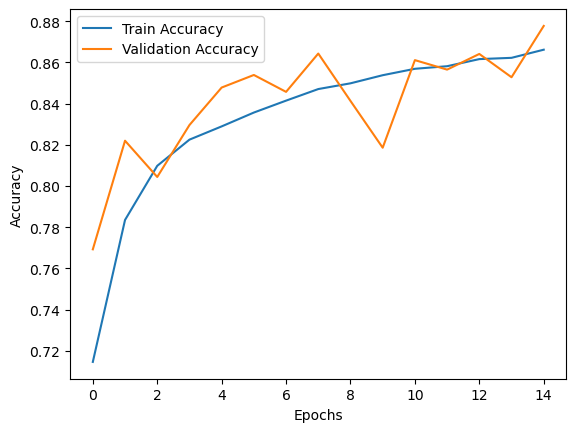

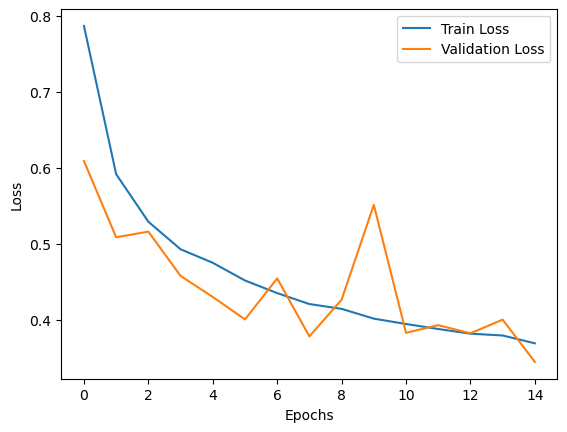

In [22]:
# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### **Step 10: Make Predictions on Test Data**

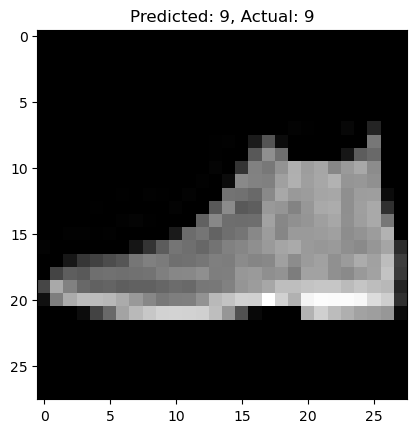

In [23]:
predictions = model.predict(x_test)

# Plot an example image and its predicted label
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[0])}, Actual: {y_test[0]}")
plt.show()

### **Next Steps for Even More Complexity**
- Use a Pretrained Model - Apply transfer learning with models like ResNet or VGG16.
- Experiment with Hyperparameters - Change optimizer, batch size, or learning rate.
- Train on a Custom Dataset - Try a dataset from Kaggle or Google Dataset Search.
- Optimize for Deployment - Convert the model to TF Lite or TensorFlow.js.

In [1]:
# The End.

## The End.